# _OPTIMIZING WELL BEING AT WORK_
                    -by Oze energies

## Team -C14

# Team Members
    -Riddhi Mehta 
    -Rubina Shaikh
    -Shefali Digikar
    -Shikshita Juyal

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats

import seaborn as sns

In [2]:

train_ip =pd.read_csv('train_input.csv')
train_op=pd.read_csv('train_output.csv')
test_ip=pd.read_csv('test_input.csv')

In [3]:
Q1=train_ip['CO2'].quantile(0.25)
Q3=train_ip['CO2'].quantile(0.75)
IQR=Q3-Q1
train_ip[(train_ip['CO2']<Q1-1.5*IQR) | (train_ip['CO2']>Q3+1.5*IQR)]['CO2']

66      1061.0
67      1221.0
69      1219.0
89      1167.0
114     1175.0
115     1791.0
116     2168.0
169     1092.0
170     1145.0
171     1224.0
172     1198.0
173     1121.0
174     1097.0
175     1081.0
176     1096.0
177     1123.0
178     1091.0
179     1071.0
180     1068.0
181     1069.0
184     1068.0
185     1104.0
186     1119.0
187     1143.0
188     1158.0
189     1313.0
190     1386.0
191     1494.0
347     1097.0
348     1076.0
         ...  
6754    1298.0
6755    1257.0
6756    1253.0
6757    1147.0
6798    1082.0
6799    1062.0
6800    1126.0
6852    1072.0
7080    1072.0
7086    1068.0
7087    1083.0
7088    1086.0
7410    1073.0
7411    1093.0
7412    1105.0
7743    1122.0
7744    1183.0
7745    1136.0
7746    1123.0
7792    1117.0
7793    1150.0
7794    1161.0
7795    1077.0
7798    1140.0
7799    1254.0
7800    1252.0
7801    1293.0
7802    1298.0
7803    1209.0
7804    1104.0
Name: CO2, Length: 317, dtype: float64

In [4]:
##### dont add

t=train_ip[(train_ip['Bright']>1)]['Bright']
#print(t)
print(t.median())
Q1=t.quantile(0.25)
Q3=t.quantile(0.75)
IQR=Q3-Q1
#t[(t<Q1-1.5*IQR) | (t>Q3+1.5*IQR)]


#filter=(t>=Q1-1.5*IQR) & (t<=Q3+1.5*IQR)
#t.loc[filter]


64.0


In [5]:
train_ip['Bright'].max()

882.0

In [6]:
print(outliers_Humidity)
#print(min(outliers_CO2))

NameError: name 'outliers_Humidity' is not defined

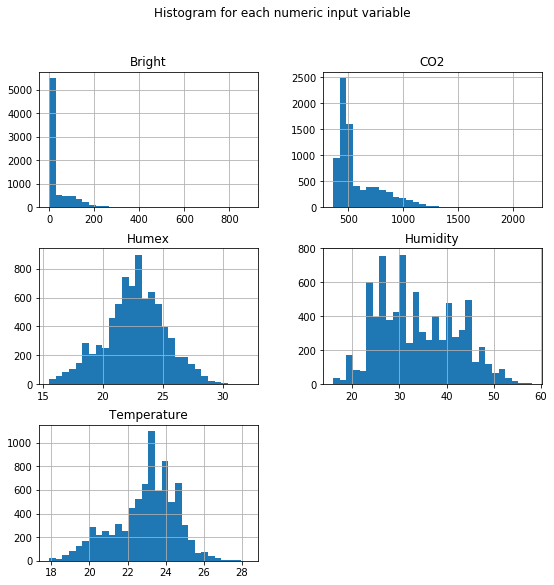

In [17]:
import pylab as pl
train_ip.drop('ID', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('train_hist')
plt.show()

In [8]:
#train_ip['Bright'].hist()

train_ip['Bright']=train_ip['Bright'].apply(np.log)
train_ip['CO2']=train_ip['CO2'].apply(np.log)
train_ip['Temperature']=train_ip['Temperature'].apply(np.log)
train_ip['Humidity']=train_ip['Humidity'].apply(np.log)

#plt.show()

NameError: name 'np' is not defined

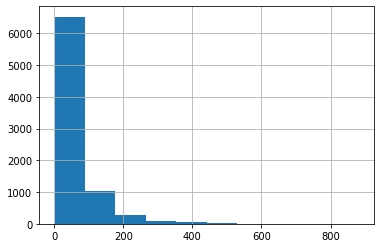

In [9]:
train_ip['Bright'].hist()

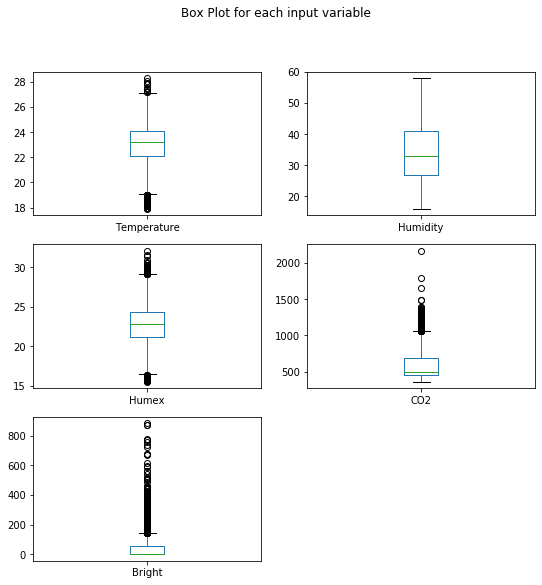

In [10]:
train_ip.drop('ID', axis=1).plot(kind='box', subplots=True, layout=(3,2), figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('train_boxplot')
plt.show()



In [11]:
from matplotlib.pyplot import boxplot

boxplot.stats(train_ip['CO2'])

AttributeError: 'function' object has no attribute 'stats'

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_ip.drop('ID', axis=1), figsize=(20, 15))
plt.show()

In [ ]:
train_ip['Humex_Temperature']=train_ip['Humex']*train_ip['Temperature']

train_ip['Date'] = pd.to_datetime(train_ip['Date'], format='%Y-%m-%d %H:%M:%S')
train_ip
train_ip['hour_Date'] = train_ip['Date'].dt.hour
train_ip['minute_Date'] = train_ip['Date'].dt.minute
train_ip.dtypes

In [ ]:
feature_names = ['Humex','Temperature', 'CO2','Humidity','Bright']

X = train_ip[feature_names]
y = train_op['Score']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train.shape[0]

NameError: name 'X_train' is not defined

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#stats.zscore(X_train)
#stats.zscore(X_test)
#min_val=np.min(X_train)
#max_val=np.max(X_train)
#(X_train-min_val)/(max_val-min_val)


#min_val1=np.min(X_test)
#max_val1=np.max(X_test)
#(X_test-min_val1)/(max_val1-min_val1)


#print(min(X_train[4]))
#print(max(X_train[4]))
X_train


NameError: name 'X_train' is not defined

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

NameError: name 'X_train' is not defined

In [15]:
k_range = range(1, 40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])

NameError: name 'KNeighborsClassifier' is not defined

In [16]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

NameError: name 'X_train' is not defined

In [512]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, y_train)
print(svm.get_params())

print('Accuracy of svm classifier on training set: {:.6f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of svm classifier on test set: {:.6f}'
     .format(svm.score(X_test, y_test)))


{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy of svm classifier on training set: 0.539167
Accuracy of svm classifier on test set: 0.549500


In [513]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.57
Accuracy of GNB classifier on test set: 0.58


In [514]:
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.42
Accuracy of GNB classifier on test set: 0.43


In [515]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [516]:

pred = clf.predict(X_test)
print(pred)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(accuracy_score(y_test, pred)))

[3. 4. 2. ... 4. 3. 3.]
Accuracy of Decision Tree classifier on test set: 0.58


In [586]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint                 # pprint is used to print very long data
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [587]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]                # bootstrap = Random sampling of data wuth replacement
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [588]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [594]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [589]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]                # bootstrap = Random sampling of data wuth replacement
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]}


In [590]:
# First create the base model to tune
gf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gf_random = GridSearchCV(estimator = gf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
gf_random.fit(X, y)


Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 20.

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [591]:
gf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 45}

In [610]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(bootstrap= True,max_depth= 10,max_features= 'sqrt',min_samples_leaf= 4,min_samples_split= 5,n_estimators=150)
rmf.fit(X_train, y_train)
print(rmf.get_params())

print('Accuracy of   RandomForestClassifier on training set: {:.6f}'
     .format(rmf.score(X_train, y_train)))
print('Accuracy of  RandomForestClassifier on test set: {:.6f}'
     .format(rmf.score(X_test, y_test)))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy of   RandomForestClassifier on training set: 0.749667
Accuracy of  RandomForestClassifier on test set: 0.752000


In [518]:

from numpy import loadtxt
from xgboost import XGBClassifier

In [611]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model.get_params())

print('Accuracy of   XGBoost Classifier on training set: {:.6f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of   XGBoost Classifier on test set: {:.6f}'
     .format(model.score(X_test, y_test)))


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Accuracy of   XGBoost Classifier on training set: 0.743333
Accuracy of   XGBoost Classifier on test set: 0.746500


C:\Users\Shefi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shefi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [580]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfr.fit(X_train, y_train)
print(rfr.get_params())

print('Accuracy of   RandomForestRegressor on training set: {:.6f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of   RandomForestRegressor on test set: {:.6f}'
     .format(rfr.score(X_test, y_test)))


{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy of   RandomForestRegressor on training set: 0.922553
Accuracy of   RandomForestRegressor on test set: 0.571896


In [612]:
f_names = ['Temperature', 'Humex', 'CO2','Humidity','Bright']
X_test_ip = test_ip[f_names]

In [617]:

X_test_ip = scaler.fit_transform(X_test_ip)
test_pred=rmf.predict(X_test_ip)

In [618]:
test_op=pd.DataFrame(test_pred)
test_op.to_csv(index=False)
print(test_op.to_csv(index=False))

0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
2.0
3.0
4.0
3.0
3.0
3.0
3.0
3.0
2.0
3.0
2.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
3.0
3.0
2.0
2.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.

In [620]:
test_op.to_csv('test_op_rmfwb.csv')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from

# run randomized search

random_search = RandomizedSearchCV(model2, param_distributions=param_dist,
                                   n_iter=n_iter_search)